<a href="https://colab.research.google.com/github/zmy2338/Machine-Learning-AWS/blob/main/TRAIN_AWS_P1_Lab_8_%5BSOLUTIONS%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab #8 : Logistic Regression**
---

### **Description**
In this lab, we'll learn how to use logistic regression to classify data into different categories. We'll start with binary classification, where the goal is to separate data into two categories. We'll revisit the breast cancer dataset, which consists of biopsied breast tissue samples that are classified as either malignant or benign. This is the same dataset we used in Lab 6 with the KNN model.

In the second part of the lab, we'll move on to multiclass classification, where the goal is to separate data into more than two categories. We'll use the Digits dataset, which consists of images of handwritten digits, with each image represented as an 8x8 array of grayscale pixels.

For both of these parts, we'll use pandas to load and preprocess the data, matplotlib to visualize it, and scikit-learn (sklearn) to build and evaluate the logistic regression model.

Finally, we'll return to the Titanic dataset from Kaggle and compare the performance of KNN and Logistic Regression models to see which performs best on the dataset.

<br>


### **Datasets**

> For the binary classification part of the lab, we'll use the **Breast Cancer Wisconsin (Diagnostic) dataset**, which can be loaded using scikit-learn's `load_breast_cancer` function. The dataset consists of 569 samples of biopsied breast tissue, each described by 30 features. The goal is to classify each tissue sample as either malignant (cancerous) or benign (non-cancerous).

> For the multiclass classification part of the lab, we'll use the **Digits dataset**, which can be loaded using scikit-learn's `load_digits` function. The dataset consists of 1,797 images of handwritten digits, with each image represented as an 8x8 array of grayscale pixels. The goal is to classify each image into one of 10 classes, corresponding to the digits 0-9.

<br>

### **Lab Structure**
**Part 1**: Binary Classification

**Part 2**: Multiclass Classification

**Part 3**: Titanic Project Continued: Battle of the Models

> **Part 3.1:** Build, Train, and Validate Models

> **Part 3.2:** [OPTIONAL] Make Predictions


<br>

### **Goals** 
By the end of this lab, you will:
* Know how to implement logistic regression for binary classification.
* Know how to implement logistic regression for multiclass classification.
* Understand how to validate models by choosing an appropriate metric and using the validation dataset.

<br>

### **Cheat Sheets**
[Logistic Regression with sklearn](https://docs.google.com/document/d/1rLTuWGgx9E-K1pgWYxUF4B1ExKKxt6MVSkgEKoUbhuE/edit?usp=sharing)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, load_digits

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

---
## **Part 1: Binary Classification**
---

In this lab, we'll learn how to use logistic regression to classify breast cancer tumors as malignant or benign. We'll use pandas to load and preprocess the data, matplotlib to visualize it, and scikit-learn (sklearn) to build and evaluate the logistic regression model.

**The code for loading the dataset has been provided for you. Run the cell below.**

In [ ]:
data = load_breast_cancer()

X = data.data
y = data.target

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


##### **Problem #1: Print a summary of the dataset.**
---

###### **Solution**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

The data has been pre-cleaned so we can move on to modeling.

##### **Problem #2: Split the data into train and test sets.**
---

We are not comparing models or making changes to the model, so we will skip adding a validation set this time. Make sure the test dataset is 20% of the original dataset.

###### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### **Problem #3: Import, initialize, and train a Logistic Regression model.**
---


###### **Solution**

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=7921723)
clf.fit(X_train, y_train);

##### **Problem #4: Make predictions for the test data.**
---


In [ ]:
y_pred = # COMPLETE THIS LINE

y_pred_proba = # COMPLETE THIS LINE

y_pred_binary = # COMPLETE THIS LINE

###### **Solution**

In [ ]:
y_pred = clf.predict(X_test)
#y_pred

y_pred_proba = clf.predict_proba(X_test)
#y_pred_proba

y_pred_binary = (y_pred_proba[:, 1] > 0.5).astype(int)
print(y_pred_proba)
print(y_pred_binary)

[[1.14034087e-01 8.85965913e-01]
 [9.99999989e-01 1.08546708e-08]
 [9.92843752e-01 7.15624834e-03]
 [4.64464244e-03 9.95355358e-01]
 [1.64196571e-03 9.98358034e-01]
 [9.99999999e-01 1.00096259e-09]
 [1.00000000e+00 2.47385914e-12]
 [9.94851344e-01 5.14865588e-03]
 [4.66687396e-03 9.95333126e-01]
 [2.28582523e-02 9.77141748e-01]
 [4.05252336e-02 9.59474766e-01]
 [9.99528504e-01 4.71496245e-04]
 [1.56523156e-02 9.84347684e-01]
 [5.01010326e-01 4.98989674e-01]
 [6.79674499e-03 9.93203255e-01]
 [9.98859338e-01 1.14066179e-03]
 [5.32034070e-03 9.94679659e-01]
 [2.82554013e-04 9.99717446e-01]
 [4.73268498e-03 9.95267315e-01]
 [9.99999551e-01 4.49021842e-07]
 [1.71057688e-01 8.28942312e-01]
 [3.46252698e-02 9.65374730e-01]
 [9.99999992e-01 7.60533594e-09]
 [5.13969816e-03 9.94860302e-01]
 [8.93009254e-03 9.91069907e-01]
 [1.08258332e-03 9.98917417e-01]
 [5.57588433e-03 9.94424116e-01]
 [3.45250042e-03 9.96547500e-01]
 [8.32740855e-03 9.91672591e-01]
 [9.99999859e-01 1.40724096e-07]
 [3.561306

##### **Problem #5: Print the accuracy score.**
---


In [ ]:
accuracy = # WRITE YOUR CODE HERE
print(f'Accuracy: {accuracy}')

###### **Solution**

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9649122807017544


##### **Problem #6: Print the classification report.**
---

In [ ]:
report = # WRITE YOUR CODE HERE
print(report)

###### **Solution**

In [ ]:
report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print(report)

              precision    recall  f1-score   support

      Benign       0.98      0.93      0.95        43
   Malignant       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#### **Discussion Question: How did Logistic Regression perform compared to the KNN model in Lab 6?**

---

<center>

#### **Back to lecture**

---

---
## **Part 2: Multiclass Classification**
---

In this section, we'll learn how to use logistic regression to classify handwritten digits into their respective numerical values. We'll use the digits dataset, which consists of 1797 samples of grayscale images of size 8x8 pixels, each represented as a 64-dimensional feature vector. The goal is to classify each image into one of 10 classes (corresponding to the 10 digits).

##### **Problem #7: Load and plot the data.**
---

We will provide code to load the data into a dataframe and plot a sample. Separate the data into `X` (features) and `y` (target) variables.

In [ ]:
data = load_digits()
df = pd.DataFrame(data.data, columns=[f'pixel{i}' for i in range(64)])
df['target'] = data.target

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(8, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(data.images[i], cmap='binary')
    ax.set_title(f'Target: {data.target[i]}')
plt.show()

X = # WRITE YOUR CODE HERE
y = # WRITE YOUR CODE HERE

###### **Solution**

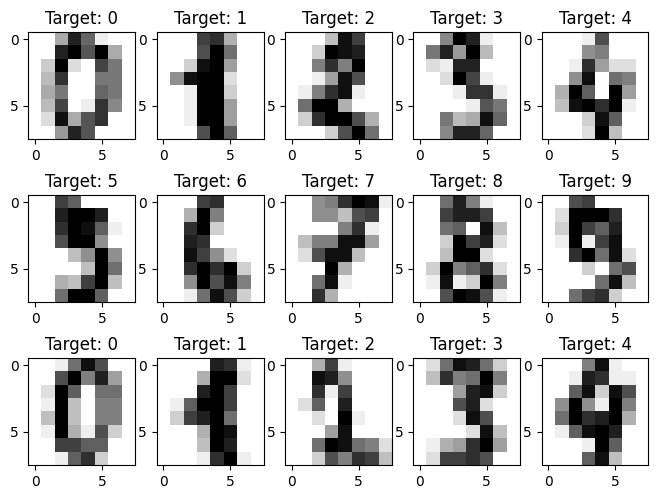

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [ ]:
data = load_digits()
df = pd.DataFrame(data.data, columns=[f'pixel{i}' for i in range(64)])
df['target'] = data.target

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(8, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(data.images[i], cmap='binary')
    ax.set_title(f'Target: {data.target[i]}')
plt.show()

X = df.drop('target', axis=1)
y = df['target']
df

##### **Problem #8: Split the data into train and test sets.**
---

We are not comparing models or making changes to the model, so we will skip adding a validation set this time. Make sure the test dataset is 20% of the original dataset.

###### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### **Problem #9: Initialize and train a Logistic Regression model for multiclass classification.**
---

Use the `ovr` multi-class mode.

###### **Solution**

In [ ]:
clf = LogisticRegression(random_state=7313544, multi_class='ovr')
clf.fit(X_train, y_train);

##### **Problem #10: Make predictions for the test data.**
---


In [ ]:
y_pred = # COMPLETE THIS LINE

y_pred_proba = # COMPLETE THIS LINE

y_pred_binary = # COMPLETE THIS LINE

###### **Solution**

In [ ]:
y_pred = clf.predict(X_test)

y_pred_proba = clf.predict_proba(X_test)

y_pred_binary = (y_pred_proba[:, 1] > 0.5).astype(int)

y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 8, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 6, 5, 3, 6, 5, 8, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 2, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 1, 5,
       5, 1, 5, 2, 8, 8, 9, 8, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

##### **Problem #11: Print the accuracy score.**
---


In [ ]:
accuracy = # WRITE YOUR CODE HERE
print(f'Accuracy: {accuracy}')

###### **Solution**

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9583333333333334


##### **Problem #12: Plot the confusion matrix.**
---

In [ ]:
cm = # WRITE YOUR CODE HERE
disp = # WRITE YOUR CODE HERE
disp.plot()
plt.show()

###### **Solution**

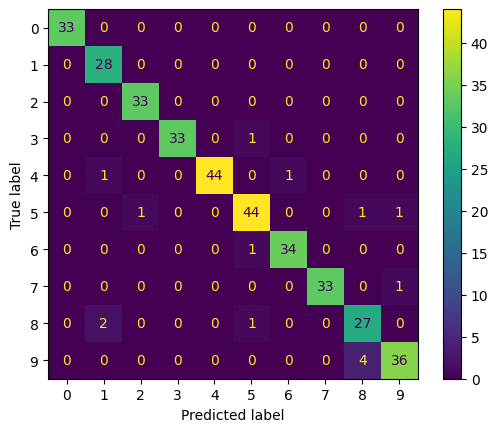

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()
print(clf.classes_)

---

<center>

#### **Back to lecture**

---

---
## **Part 3: Battle of the Titanic Models**
---

In this part, we will revisit the Titanic dataset from the [Titanic competition on Kaggle](https://www.kaggle.com/c/titanic). In Lab 4, you cleaned the data, created features, encoded features, and visualized the data to understand patterns and trends among passengers who survived. Here, we will take the analysis a step further and use the classification models we have learned about (KNN and Logistic Regression) to make predictions for whether or not a passenger survived. We will validate and improve the models to determine a winner that will make final predictions, which you have the option of submitting to the Kaggle competition if you want to find out the final score.


---

### **Part 3.1: Build, Train, and Validate Models**

---

Recall the steps for validating and improving models:

1. **Decide on a metric** as the basis for comparing the models and a target value for that metric
2. **Train** the models on the training dataset
3. **Evaluate** the models on the validation dataset with the chosen metric
4. **Make changes** to the models *if improvements are needed*
5. **Repeat** steps 2–4 until target metric is achieved by one or more models.

Next lecture, we will discuss advanced methods for validating and improving models. 

First, we'll clean and prepare the data the same way we did in Lab 4. We are creating a function that does all the data preparation. This is good practice to make sure all data is prepared the same way. We will be using the same function on the training data (which we will split further into a train/validation datasets) and the test data set (from Kaggle, we do not have the solutions for this. If you want to see the result, you'll have to submit your predictions to the competition).

**This code has been provided for you. Run the cell below.**

In [ ]:
def prepare_titanic_data(input_data):
  # We will create a copy and preserve the original dataframe
  data = input_data.copy() 

  # Clean the data
  data.drop_duplicates(inplace=True)
  data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
  data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
  data['Age'] = data['Age'].fillna(data['Age'].median())

  # Feature creation
  data.loc[data['Age'] < 18, 'AgeGroup'] = 'Child'
  data.loc[(data['Age'] >= 18) & (data['Age'] < 65), 'AgeGroup'] = 'Adult'
  data.loc[data['Age'] >= 65, 'AgeGroup'] = 'Elderly'

  data['FareGroup'] = pd.qcut(data['Fare'], 4, labels=['Cheap','Low','High','Expensive'])
  data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

  # Feature encoding
  label_map = {'male': 0, 'female': 1}
  data['Sex_encoded'] = data['Sex'].map(label_map)

  label_map = {'Child': 0, 'Adult': 1, 'Elderly': 2}
  data['AgeGroup_encoded'] = data['AgeGroup'].map(label_map)

  fare_map = {'Cheap': 0, 'Low': 1, 'High': 2, 'Expensive': 3}
  data['FareGroup_encoded'] = data['FareGroup'].map(fare_map)

  embark_map = {'S': 0, 'C': 1, 'Q': 2}
  data['Embarked_encoded'] = data['Embarked'].map(embark_map)
  
  return data

Next, we need to load and apply the function to preprocess the train and test data. 

**This code has been provided for you. Run the cell below.**

In [ ]:
# Load Kaggle train and test data
train_data = pd.read_csv("https://raw.githubusercontent.com/n-sachdeva/titanic/main/train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/n-sachdeva/titanic/main/test.csv")

# Use preprocessing function on both train and test data
train = prepare_titanic_data(train_data)
test = prepare_titanic_data(test_data)

# Select features to use for modeling
features = ["Sex_encoded","Pclass", "FamilySize", 
            "AgeGroup_encoded", "FareGroup_encoded", "Embarked_encoded"]

# Separate features and target
X = train[features]
y = train['Survived']
X_test = test[features]
train
# there is no y_test, because we do not have the truth values for the test set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FareGroup,FamilySize,Sex_encoded,AgeGroup_encoded,FareGroup_encoded,Embarked_encoded
0,0,3,male,22.0,1,0,7.2500,S,Adult,Cheap,2,0,1,0,0
1,1,1,female,38.0,1,0,71.2833,C,Adult,Expensive,2,1,1,3,1
2,1,3,female,26.0,0,0,7.9250,S,Adult,Low,1,1,1,1,0
3,1,1,female,35.0,1,0,53.1000,S,Adult,Expensive,2,1,1,3,0
4,0,3,male,35.0,0,0,8.0500,S,Adult,Low,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Adult,Low,1,0,1,1,0
887,1,1,female,19.0,0,0,30.0000,S,Adult,High,1,1,1,2,0
888,0,3,female,28.0,1,2,23.4500,S,Adult,High,4,1,1,2,0
889,1,1,male,26.0,0,0,30.0000,C,Adult,High,1,0,1,2,1


##### **Problem #13: Split the train data into a training and validation datasets.**

---



In [ ]:
# Split train data into train/validation data
X_train, X_valid, y_train, y_valid = # WRITE YOUR CODE HERE

###### **Solution**

In [ ]:
# Split train data into train/validation data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

##### **Problem #14: Initialize a logistic regression model, a KNN model with k=3, and a KNN model with k=5.**

---



In [ ]:
# Create models
logr = # WRITE YOUR CODE HERE
knn3 = # WRITE YOUR CODE HERE
knn5 = # WRITE YOUR CODE HERE

###### **Solution**

In [ ]:
# Create models
logr = LogisticRegression(random_state=42)
knn3 = KNeighborsClassifier(3)
knn5 = KNeighborsClassifier(5)

---

<center>

#### **Back to lecture**

---

#### **Step #1: Decide on a metric and target value**
---

There are many choices for metrics to use. In this case we will use accuracy, and set a target value of 0.8. These can be changed later if we learn something from the validation process that suggests this may not be the best metric or target.


#### **Step #2: Train the models on the training set.**
---



##### **Problem 15: Train each of the models: `logr`, `knn3`, and `knn5`.**
---

###### **Solution**


In [ ]:
logr.fit(X_train, y_train)
knn3.fit(X_train, y_train)
knn5.fit(X_train, y_train)

KNeighborsClassifier()

#### **Step #3: Evaluate**
---

Now, we can check the accuracy of each model on the training and validation datasets.


##### **Problem 16: Evaluate and print the accuracy scores.**
---

Fill in the code where indicated to print the accuracy scores on the training and validation datasets.

In [ ]:
# Print training and validation scores
models = [logr, knn3, knn5]
model_names = ['Logistic Regression', 'KNN-3', 'KNN-5']

# Looping over models to print scores for each
for model, name in zip(models, model_names):
  train_predictions = model.predict(# FILL IN CODE HERE)
  train_score = accuracy_score(# FILL IN CODE HERE)
  print(name)
  print(f'Training Accuracy: {train_score}')
  validation_predictions = model.predict(# FILL IN CODE HERE)
  validation_score = accuracy_score(# FILL IN CODE HERE)
  print(f'Validation Accuracy: {validation_score}\n')


###### **Solution**

In [ ]:
# Print training and validation scores
models = [logr, knn3, knn5]
model_names = ['Logistic Regression', 'KNN-3', 'KNN-5']

for model, name in zip(models, model_names):
  train_predictions = model.predict(X_train)
  train_score = accuracy_score(y_train,train_predictions)
  print(name)
  print(f'Training Accuracy: {train_score}')
  validation_predictions = model.predict(X_valid)
  validation_score = accuracy_score(y_valid,validation_predictions)
  print(f'Validation Accuracy: {validation_score}\n')


Logistic Regression
Training Accuracy: 0.8033707865168539
Validation Accuracy: 0.7877094972067039

KNN-3
Training Accuracy: 0.8328651685393258
Validation Accuracy: 0.7932960893854749

KNN-5
Training Accuracy: 0.8384831460674157
Validation Accuracy: 0.8212290502793296



#### **Discussion Questions**

* Did any of the models reach the target value on the validation set? 
* What trends do you notice in the results?
* Did any models show signs of overfitting or underfitting? How so?

##### **Problem 17: Which model performed best?**

In [ ]:
winning_model = # ADD THE WINNING MODEL HERE

###### **Solution**

In [ ]:
winning_model = knn5

---

### **[OPTIONAL] Part 3.2: Make Final Predictions**  

---

Now, we can make final predictions. This dataset is from the [Kaggle Titanic competition](https://www.kaggle.com/c/titanic). There is a test dataset from the competition we can use for final predictions. **We do not have the solutions for the test data.** We will provide code to generate a submission file you can upload on Kaggle if you'd like to submit your work and see the score on Kaggle. You will need to create a Kaggle account to do so. As you progress in this course, feel free to apply your knowledge to improve the features and models in this notebook and resubmit your predictions on Kaggle.

Run the cell below. The file `submission.csv` will appear in your file explorer on the left side panel. You may download it to your computer and upload it to the competition to see your score.

In [ ]:
predictions = winning_model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Successfully saved!")

Successfully saved!


#End of notebook
---
© 2023 The Coding School, All rights reserved